<a href="https://colab.research.google.com/github/pipimaru1/colabsample/blob/main/Auto_SinDataDemo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIと必要なライブラリを読み込む

In [1]:
# TF114 OK
# TF140GPU OK
# TF160GPU OK tensorlflow 2.0.1 GPU OK 
# AutoEnc1 (tensorlflow 2.2.0 CPU) NG
# condaでsklearnを入れる場合は右記 conda install -c anaconda scikit-learn
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

## 学習用データの作成
ノイズを混ぜたsin波を１０,０００個用意 振幅よりノイズが大きいくらい
多数データのほかに少数データも混ぜる

In [2]:
# 時系列データ長を100とする
input_data_length = 100

# データ長100のsin波にノイズ大を足したデータを10000個作成
s1 = np.array([ np.sin( np.linspace(0,  np.pi*2, input_data_length) )*1 + np.random.randn(input_data_length) * 0.50 for _ in range(10000) ])

is1 = np.array([ np.sin( np.linspace(0, -np.pi*2, input_data_length) ) * 1.0+ np.random.randn(input_data_length)  * 0.50 for _ in range(1000)])
is2 = np.array([ np.sin( np.linspace(0,  np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.10 for _ in range(100)])
is3 = np.array([ np.sin( np.linspace(0,  np.pi*4, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.50 for _ in range(10)])
is4 = np.array([ np.sin( np.linspace(0,  np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 1.00 for _ in range(10)])

ic1 = np.array([ np.cos( np.linspace(0,  np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.50 for _ in range(100) ])
ic2 = np.array([ np.cos( np.linspace(0, -np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.50 for _ in range(100) ])
ic3 = np.array([ np.cos( np.linspace(0,  np.pi*2, input_data_length) ) * 0.5 + np.random.randn(input_data_length) * 0.25 for _ in range(10)])


# データ結合
#input_data = np.vstack([__s1,__s2])
input_data = np.vstack([s1,is1,is2,is3,is4,ic1,ic2,ic3])

# データをシャッフル
np.random.seed(seed=42)
np.random.shuffle(input_data)

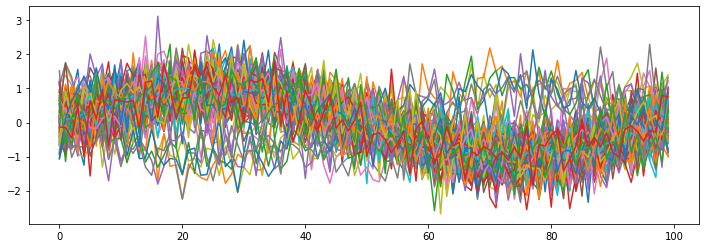

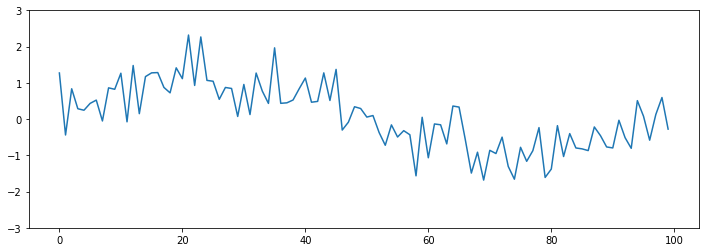

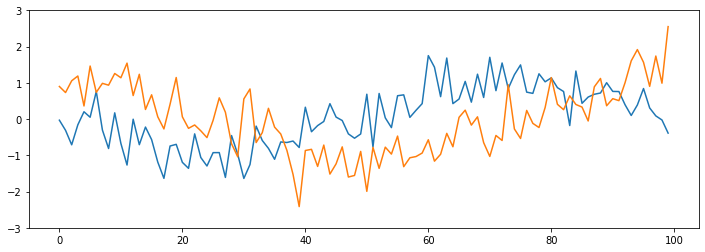

In [3]:
# 全時系列データを可視化
plt.figure(figsize=(12, 4))
_ = [ plt.plot(np.arange(0, input_data_length), x) for x in input_data[::100] ]

#print("1つだけだとこんな波形")
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), s1[100])]

plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), is1[5])]
_ = [ plt.plot(np.arange(0, input_data_length), ic2[5])]

## AIの構成 

In [4]:
#AIモデルの構成

# DeepAutoEncoderモデルの構築
input_layer = Input(shape=(100,))
encoded = Dense(50, activation="relu")(input_layer)
encoded = Dense(25, activation="relu")(encoded)
decoded = Dense(50, activation="relu")(encoded)
output_layer = Dense(100, activation="sigmoid")(decoded)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam',
              loss='mse',
               metrics=['accuracy', 'binary_crossentropy'])


## 学習の実行

In [5]:
# 正規化
ss = preprocessing.StandardScaler()
input_data_scaler = ss.fit_transform(input_data)

# 学習
epochs = 200
batch_size = 128
validation_split = 0.25
__study_log=model.fit(input_data_scaler, input_data_scaler, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/200
67/67 [==============================] - 1s 10ms/step - loss: 1.1561 - accuracy: 0.0135 - binary_crossentropy: 0.3963 - val_loss: 0.9087 - val_accuracy: 0.0109 - val_binary_crossentropy: -1.1545
Epoch 2/200
67/67 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.0114 - binary_crossentropy: -1.2293 - val_loss: 0.8908 - val_accuracy: 0.0212 - val_binary_crossentropy: -1.7488
Epoch 3/200
67/67 [==============================] - 0s 3ms/step - loss: 0.8558 - accuracy: 0.0208 - binary_crossentropy: -1.6761 - val_loss: 0.8791 - val_accuracy: 0.0466 - val_binary_crossentropy: -2.0894
Epoch 4/200
67/67 [==============================] - 0s 3ms/step - loss: 0.8373 - accuracy: 0.0535 - binary_crossentropy: -1.9422 - val_loss: 0.8658 - val_accuracy: 0.0717 - val_binary_crossentropy: -2.3542
Epoch 5/200
67/67 [==============================] - 0s 3ms/step - loss: 0.8347 - accuracy: 0.0798 - binary_crossentropy: -2.2814 - val_loss: 0.8535 - val_accuracy: 0.0911 

学習曲線


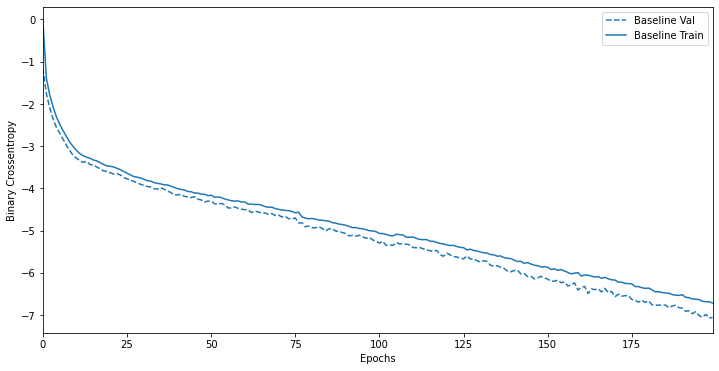

In [6]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(12,6))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],'--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])
print("学習曲線")
plot_history([('baseline', __study_log)])

In [7]:
#学習保存
#model.save_weights('weight_e250b128v1.hdf5')
#学習読込
#model.load_weights('weight2.hdf5')

## 特徴量(平均二乗誤差 (MSE))の分布
平均二乗誤差 (MSE)の分布を確認
インプットされた波形と波形から得た特徴量から再生成した波形との差の大きさの分布

No handles with labels found to put in legend.


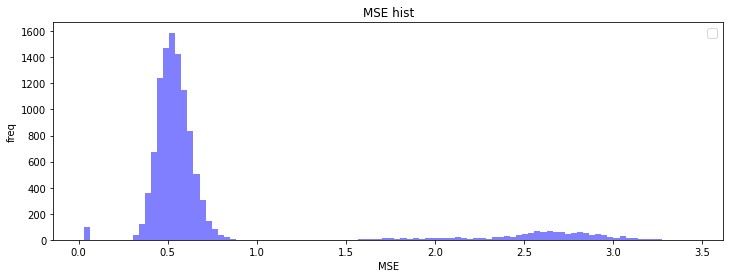

In [8]:
# モデルに時系列データを入力し、モデルが推定した時系列データを出力させる
predict_data = model.predict(input_data_scaler)

# MSEを計算
all_data_mse = [ mean_squared_error(x, y) for x, y in zip(predict_data, input_data_scaler) ]

# MSEをヒストグラムで表示
plt.figure(figsize=(12, 4))
plt.hist(all_data_mse, bins=100, color="blue", alpha=0.5)
plt.title("MSE hist")
plt.xlabel("MSE")
plt.ylabel("freq")
plt.legend(fontsize=12)

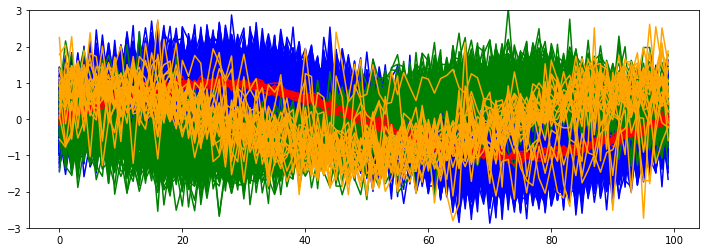

In [ ]:
# モデルに時系列データを入力し、モデルが推定した時系列データを出力させる
#重いので1/100に減らす
input_data2=input_data[::10]
__idata_scaler2 = ss.fit_transform(input_data2)
__pdata2 = model.predict(__idata_scaler2)

# MSEを計算
__mse2 = [ mean_squared_error(x, y) for x, y in zip(__pdata2, __idata_scaler2) ]

# MSEが10以上の時系列データのindexを取得する
__index1 = np.where(np.array(__mse2) <= 0.25)[0]
__index2 = np.where((np.array(__mse2) > 0.25)&(np.array(__mse2) <= 1.0))[0]
__index3 = np.where((np.array(__mse2) > 1.00)&(np.array(__mse2) <= 2.2))[0]
__index4 = np.where(np.array(__mse2) >= 2.20)[0]

# MSE10未満の時系列データを青で描画、MSE10以上の時系列データを赤で描画
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), x, color="blue")   for x in input_data2[__index2] ]
_ = [ plt.plot(np.arange(0, input_data_length), x, color="green") for x in input_data2[__index4] ]
_ = [ plt.plot(np.arange(0, input_data_length), x, color="red")    for x in input_data2[__index1] ]
_ = [ plt.plot(np.arange(0, input_data_length), x, color="orange") for x in input_data2[__index3] ]


MSEが0.4～1.4以内を正常データとする

## 形の違う振動データを作り識別できるか試す

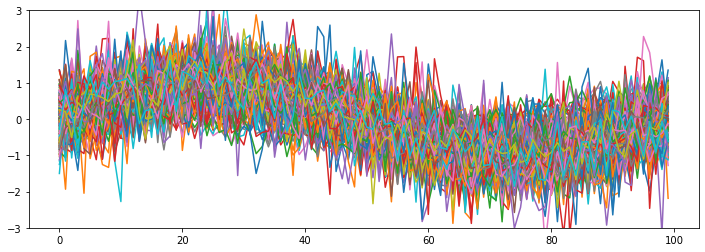

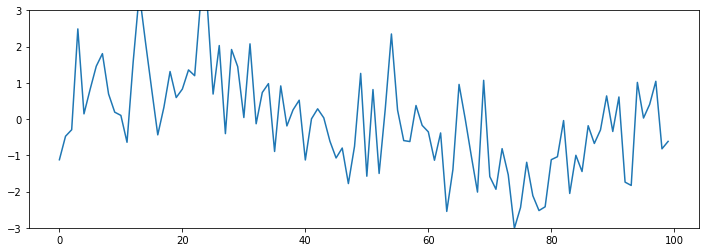

In [ ]:
#デモ用データの作成
#①sin波とノイズ　マジョリティデータ　正常データとして１００個
#②cos波とノイズ  マイノリティデータ　異常データとして１０個
#③sin波と小ノイズ  マイノリティデータ　異常データとして１０個

# 時系列データ長を100とする
__LEN = 100
__sin1 = np.array([ np.sin( np.linspace(0, np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.50 for _ in range(200)])
__sin2 = np.array([ np.sin( np.linspace(0, np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.10 for _ in range(10)])
__sin4 = np.array([ np.sin( np.linspace(0, np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 1.00 for _ in range(10)])
__cos3 = np.array([ np.cos( np.linspace(0, np.pi*2, input_data_length) ) * 0.5 + np.random.randn(input_data_length) * 0.3 for _ in range(10)])

# データ結合
__idata2=[]
__idata2 = np.vstack([__sin1, __sin2, __cos3, __sin4])

# データをシャッフル
np.random.seed(seed=12)
np.random.shuffle(__idata2)

# 全時系列データを可視化
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, __LEN), x) for x in __idata2 ]

#異常データの例
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), __sin4[7])]

正常データに異常データを混ぜてある

## AIに入れてみる

No handles with labels found to put in legend.


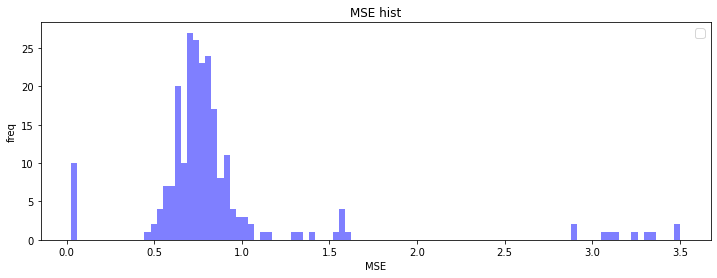

In [ ]:
# 正規化
#ss = preprocessing.StandardScaler()
__idata_scaler2 = ss.fit_transform(__idata2)

# モデルに時系列データを入力し、モデルが推定した時系列データを出力させる
__pdata2 = model.predict(__idata_scaler2)

# MSEを計算
__adata_mse2 = [ mean_squared_error(x, y) for x, y in zip(__pdata2, __idata_scaler2) ]

# MSEをヒストグラムで表示
plt.figure(figsize=(12, 4))
plt.hist(__adata_mse2, bins=100, color="blue", alpha=0.5)
plt.title("MSE hist")
plt.xlabel("MSE")
plt.ylabel("freq")
plt.legend(fontsize=12)

## AIで識別したデータ　

上がAI判定、下が元データ　青:正常 オレンジ:ノイズ大 赤:位相違い 緑:ノイズ少


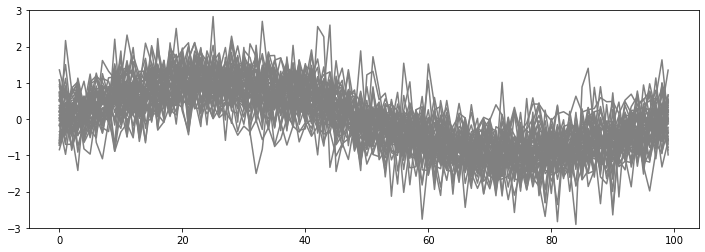

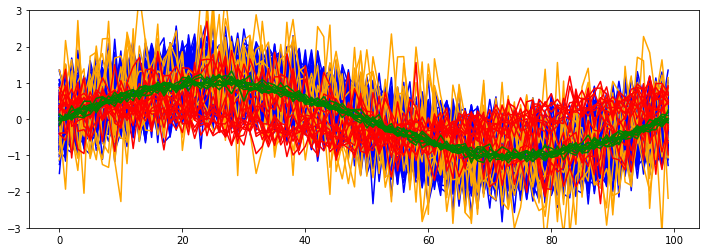

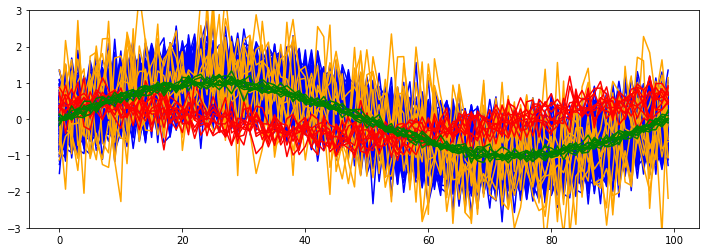

In [ ]:
# MSEが10以上の時系列データのindexを取得する

# MSE10未満の時系列データを青で描画、MSE10以上の時系列データを赤で描画
# MSEが10以上の時系列データのindexを取得する
__index1 = np.where(np.array(__adata_mse2) <= 0.25)[0]
__index2 = np.where((np.array(__adata_mse2) > 0.25)&(np.array(__adata_mse2) <= 1.0))[0]
__index3 = np.where((np.array(__adata_mse2) > 1.00)&(np.array(__adata_mse2) <= 2.2))[0]
__index4 = np.where(np.array(__adata_mse2) >= 2.20)[0]

# 全時系列データを可視化
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, __LEN), x,color="grey") for x in __idata2[::5] ]

# MSE10未満の時系列データを青で描画、MSE10以上の時系列データを赤で描画
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, __LEN), x, color="blue")   for x in __idata2[__index2] ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="orange") for x in __idata2[__index4] ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="red") for x in __idata2[__index3] ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="green")    for x in __idata2[__index1] ]

print("上がAI判定、下が元データ　青:正常 オレンジ:ノイズ大 赤:位相違い 緑:ノイズ少")
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, __LEN), x, color="blue")   for x in __sin1 ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="orange") for x in __sin4 ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="red")    for x in __cos3 ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="green") for x in __sin2 ]

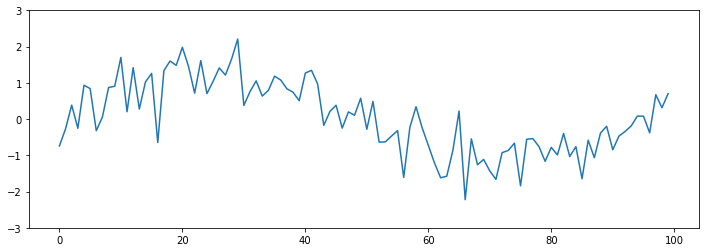

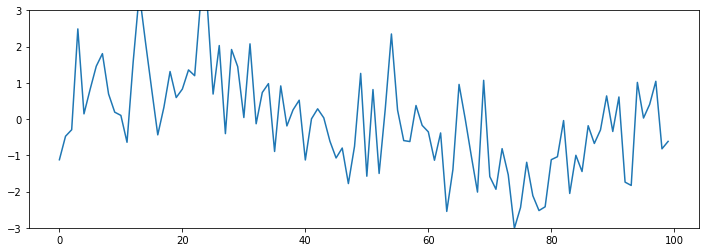

In [ ]:
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), __sin1[5])]

plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), __sin4[7])]

## まったく学習させていない波形
異なる周波数を検出できるか
異物混入、ベアリング破損
よく似た波形だけど小さい周波数の波を持った波形

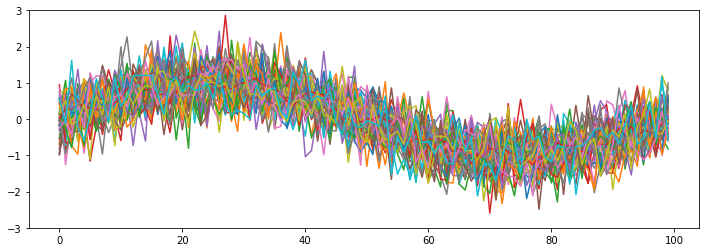

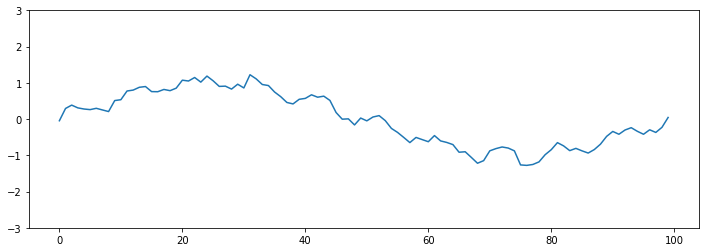

In [ ]:
# 時系列データ長を100とする
__LEN = 100
__sin1 = np.array([ np.sin( np.linspace(0, np.pi*2, input_data_length) ) * 1.0 + np.random.randn(input_data_length) * 0.50 for _ in range(50)])
__sin5 = np.array([ np.sin( np.linspace(0, np.pi*2, input_data_length) ) * 1.0 +np.sin( np.linspace(0, np.pi*20, input_data_length) ) * 0.2+ np.random.randn(input_data_length) * 0.07 for _ in range(10)])

# データ結合
__idata2 = np.vstack([__sin1, __sin5])

# データをシャッフル
np.random.seed(seed=12)
np.random.shuffle(__idata2)

# 全時系列データを可視化

    
plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, __LEN), x) for x in __idata2 ]

plt.figure(figsize=(12, 4))
plt.ylim(-3,3)
_ = [ plt.plot(np.arange(0, input_data_length), __sin5[7])]


No handles with labels found to put in legend.


異常波検出率(MSE>0.4)= 100.0 %


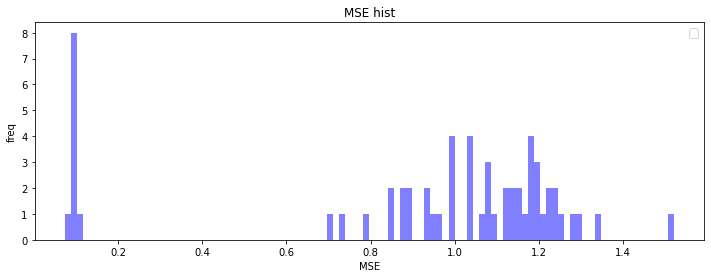

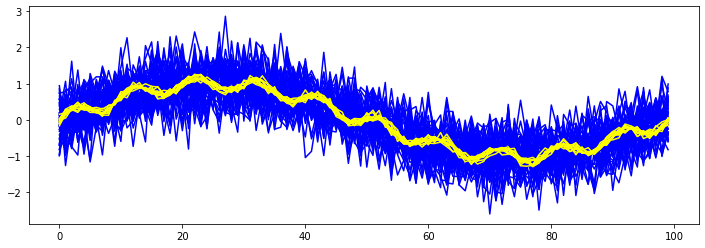

In [ ]:
# 正規化
#ss = preprocessing.StandardScaler()
__idata_scaler2 = ss.fit_transform(__idata2)

# モデルに時系列データを入力し、モデルが推定した時系列データを出力させる
__pdata2 = model.predict(__idata_scaler2)

# MSEを計算
__adata_mse2 = [ mean_squared_error(x, y) for x, y in zip(__pdata2, __idata_scaler2) ]

# MSEをヒストグラムで表示
plt.figure(figsize=(12, 4))
plt.hist(__adata_mse2, bins=100, color="blue", alpha=0.5)
plt.title("MSE hist")
plt.xlabel("MSE")
plt.ylabel("freq")
plt.legend(fontsize=12)

# MSEが10以上の時系列データのindexを取得する
__abnormal_index2 = np.where(np.array(__adata_mse2) <= 0.4)[0]

print("異常波検出率(MSE>0.4)=",__abnormal_index2.size/10*100, "%")

# MSE10未満の時系列データを青で描画、MSE10以上の時系列データを赤で描画
plt.figure(figsize=(12, 4))
_ = [ plt.plot(np.arange(0, __LEN), x, color="blue") for x in __idata2 ]
_ = [ plt.plot(np.arange(0, __LEN), x, color="yellow") for x in __idata2[__abnormal_index2] ]